In [3]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from IPython.display import Latex
from scipy.integrate import quad
import math

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


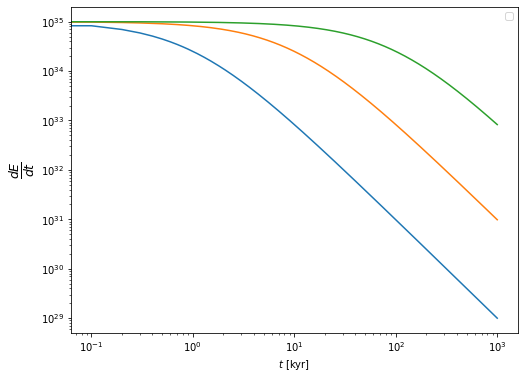

In [4]:
# Define experimental range

Edot_0 = float(1e35)
tau_0 = [1, 10, 100]
n_range = [2, 3, 4]
t_range = np.arange(0, 1000, 0.1)

# Plot with Edot as a function of time for Edot_0 = 1e35 erg/s, 
# tau_0 = [1, 10, 100], n = 3
fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$\frac{dE}{dt}$', fontsize = 18)
plt.xlabel(r'$t$ [kyr]')
for tau in tau_0:
    y = np.zeros(len(t_range))
    for i, t in enumerate(t_range):
        y[i] = Edot_0*np.power(float(1+t/tau),float(-(n_range[1]+1)/(n_range[1]-1)))
    plt.plot(t_range, y)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


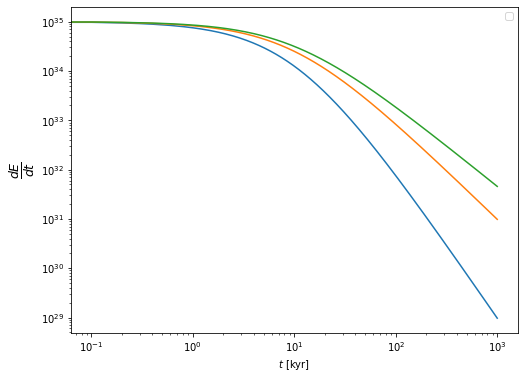

In [5]:
# Plot with Edot as a function of time for Edot_0 = 1e35 erg/s, 
# tau_0 = 10, n = [2, 3, 4]
fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$\frac{dE}{dt}$', fontsize = 18)
plt.xlabel(r'$t$ [kyr]')
for n in n_range:
    y = np.zeros(len(t_range))
    for i, t in enumerate(t_range):
        y[i] = Edot_0*np.power(float(1+t/tau_0[1]),float(-(n+1)/(n-1)))
    plt.plot(t_range, y)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


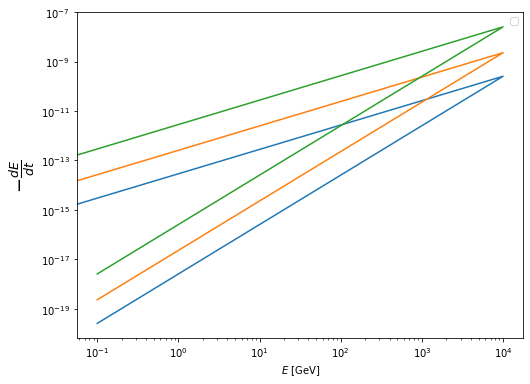

In [6]:
# Plot energy losses for synchrotron radiation for different values of 
# magnetic field B = [1, 3, 10] in micro-Gauss

E_range = (0, 10000, 0.1)
B_range = [1, 3, 10]

fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$-\frac{dE}{dt}$', fontsize = 18)
plt.xlabel(r'$E$ [GeV]')
for B in B_range:
    y = np.zeros(len(E_range))
    for i, E in enumerate(E_range):
        y[i] = 2.53*10**(-18)*np.power(B,2)*np.power(E,2)
    plt.plot(E_range, y)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


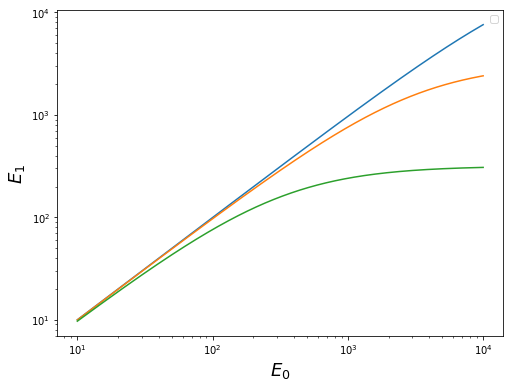

In [7]:
# Define necessary constants

# vector = np.power(10.,np.arange(log10(1.),log10(1e4)+0.1,0.1))

kyr = 1000*365*24*3600
E_0_range = range(10, 10**4)
T_range = [10, 100, 1000]
alpha = 2
b_0 = 1e-16

fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$E_1$', fontsize = 18)
plt.xlabel(r'$E_0$', fontsize = 18)
for T in T_range:
    E_1 = np.zeros(len(E_0_range))
    for i, E_0 in enumerate(E_0_range):
        E_1[i] = np.exp(np.log(-(1-alpha)*b_0*T*kyr+E_0**(1-alpha))/(1-alpha))
    plt.plot(E_0_range, E_1)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

C:\Users\youta\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
No handles with labels found to put in legend.
C:\Users\youta\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
No handles with labels found to put in legend.
C:\Users\youta\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
No handles with labels found to put in legend.


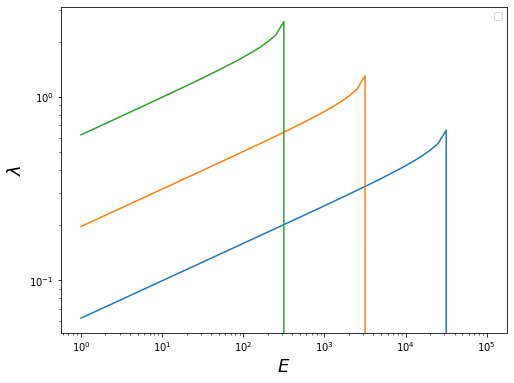

In [8]:
# Define necessary constants

kpc = 3.09e18
kyr = 1000*365*24*3600
delta = 0.408
k_0 = kpc**2*0.0967/(1.0e6*365*24*3600)
E_range = np.power(10.,np.arange(math.log10(1.),math.log10(1e5)+0.1,0.1))
T_range = [10, 100, 1000]
alpha = 2
b_0 = 1e-16

def integrand(E, delta, k_0, alpha):
    return 4*k_0/b_0*E**(delta-alpha)

fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$\lambda$', fontsize = 18)
plt.xlabel(r'$E$', fontsize = 18)
for T in T_range:
    E_s_range = np.zeros(len(E_range))
    lamda_range = np.zeros(len(E_range))
    E_max=1/(b_0*T*kyr)
    for i, E in enumerate(E_range):
        E_s_range[i] = np.exp(np.log((1-alpha)*b_0*T*kyr+E**(1-alpha))/(1-alpha))
    for j in range(len(E_range)):
        # print quad(integrand, E_range[j], E_s_range[j], args = (delta, k_0, alpha))
        if E_range[j]<=E_max:
            lamda_range[j] = math.sqrt(quad(integrand, E_range[j], E_s_range[j], args = (delta, k_0, alpha))[0])/kpc
    plt.plot(E_range, lamda_range)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [9]:
# Plot of the flux of positrons as a function of energy between 1 and 1000 GeV
# for a source with d=0.5kpc and age=100 kyrs. E_c=1000Gev, gamma=1.8,
# tau_0=10kyr, E_dot=1e35 erg/s, eta=10%. Integrate Q between 0.1 and 10000 GeV

# first define necessary constants

kpc = 3.09e18
kyr = 1000*365*24*3600
E_range = np.power(10.,np.arange(math.log10(1.),math.log10(1e5)+0.1,0.1)) #GeV
d = 0.5*kpc #kpc
T = 100*kyr #age in kyrs
E_c = 1000 #cutoff energy in GeV
gamma = 1.8
tau_0 = 10*kyr #kyr
E_dot = 1e35 #spin-down luminosity in erg/s
eta = 0.1 # flux conversion rate
delta = 0.408
k_0 = kpc**2*0.0967/(1.0e6*365*24*3600)
alpha = 2

def integrand(E, delta, k_0, alpha):
    return 4*k_0/b_0*E**(delta-alpha)

def E_0_func(E, alpha, b_0, T):
    # define E_0 as a function of E
    return (np.exp((-alpha+1)*np.log(E))+b_0*T*(-alpha+1))**(1/(-alpha+1))

def Q(E, Q_0, gamma, E_c):
    # define the source term 
    E = pow(10.,E)
    return Q_0*(E)**(-gamma)*np.exp(-E/E_c)*np.log(10.)*E

def b(b_0, E):
    # define energy loss
    return b_0*E**2

def flux(Q_0, b_0, d, E, E_c, gamma, T):
    # define positron flux
    alpha = 2
    E_0 = E_0_func(E, alpha, b_0, T)
    E_max = math.exp( (1./(1.-alpha))*math.log((alpha-1.)*T*b_0) )
    if E<E_max:
        lamda = math.sqrt(quad(integrand, E, E_0, args = (delta, k_0, alpha))[0])
        return b(b_0, E_0)/b(b_0, E)/(np.pi*lamda**2)**1.5*np.exp(-(abs(d))**2/(lamda**2))*Q(math.log10(E_0), Q_0, gamma, E_c)
    else:
        return 0
# Calculate the normalization constant Q_0

# E_tot = quad(Q,log10(0.1),log10(1.e4),args=(1.,gamma,E_c))
# Q_0 = eta*tau_0*E_dot*(1+T/tau_0)**2/E_tot

def Q_0_func(gamma, E_c, T):
    eta = 0.1 # flux conversion rate
    tau_0 = 10*kyr #kyr
    E_dot = 1e35 #spin-down luminosity in erg/s
    E_tot = quad(Q,math.log(0.1,10),math.log(1.e4,10),args=(1.,gamma,E_c))[0]
    return eta*tau_0*E_dot*(1+T/tau_0)**2/E_tot

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[   10.            21.5443469     46.41588834   100.
   215.443469     464.15888336  1000.          2154.43469003
  4641.58883361 10000.        ]


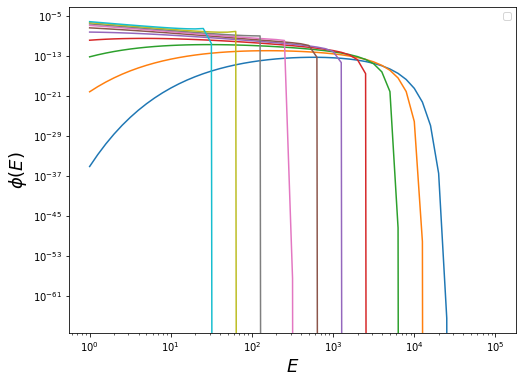

In [10]:
# Plot positron flux for different ages as a function of energy

T_range = np.logspace(1., 4.,10)*kyr
d = 0.5*kpc #kpc
print(np.logspace(1.,4.,10))

fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$\phi(E)$', fontsize = 18)
plt.xlabel(r'$E$', fontsize = 18)

for T in T_range: 
    Q_0 = Q_0_func(gamma, E_c, T)
    flux_range = np.zeros(len(E_range))
    for i, E in enumerate(E_range):
        flux_range[i] = flux(Q_0, b_0, d, E, E_c, gamma, T)
    plt.plot(E_range, flux_range)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]


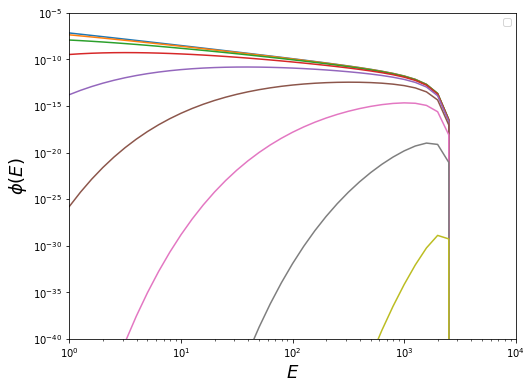

In [11]:
# Plot positron flux for different distance as a function of energy
d_range = np.logspace(-1., 1.,10)*kpc
T = 100*kyr #age in kyrs
print(np.logspace(-1.,1.,10))

fig = plt.figure(figsize = (8,6))
plt.ylabel(r'$\phi(E)$', fontsize = 18)
plt.xlabel(r'$E$', fontsize = 18)

for d in d_range: 
    Q_0 = Q_0_func(gamma, E_c, T)
    flux_range = np.zeros(len(E_range))
    for i, E in enumerate(E_range):
        flux_range[i] = flux(Q_0, b_0, d, E, E_c, gamma, T)
    plt.plot(E_range, flux_range)
    plt.legend(loc = 'best', bbox_to_anchor=(1, 1), ncol = 1)
plt.xscale('log')
plt.yscale('log')
plt.axis([10**0,10**4,10**-40,10**-5])
plt.show()
# plt.savefig('/plots_chis_sigmav_positronsDM_models_mumu_20GeV.pdf')

In [14]:
print("############################")
print("Making plot for analysis of Cosmic Ray He")
print("############################")
print("")
import astropy.io.fits as pyfits
from scipy.integrate import quad
from math import *
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
from IPython.display import Latex
from scipy.integrate import quad
import math
import os

#constants
pigreco = 3.141592653589793 
cluce = 29979245800. #cm/s
Ee = 1e-9 # eV in GeV

#normalization of the secondary production
normalization_sec = 1.2

# define necessary constants

kpc = 3.09e18
kyr = 1000*365*24*3600
#d=[0.2,0.5,1.0,2.0]
#T=[30.,100.,200.,500.]
d = 0.5*kpc #kpc
T = 100*kyr #age in kyrs
E_c = 1000 #cutoff energy in GeV
gamma = 1.8
tau_0 = 10*kyr #kyr
E_dot = 1e35 #spin-down luminosity in erg/s
eta = 0.1 # flux conversion rate
delta = 0.408
k_0 = kpc**2*0.0967/(1.0e6*365*24*3600)
alpha = 2
b_0 = 1e-16

# Extract energy range from AMS-02 data

tabledata = np.loadtxt('positron_ams02_19.dat')
E_range = tabledata[:,0]

# necessary functions to calculate positron energy flux as a function of energy
def integrand(E, delta, k_0, alpha):
    return 4*k_0/b_0*E**(delta-alpha)

def E_0_func(E, alpha, b_0, T):
    # define E_0 as a function of E
    return (np.exp((-alpha+1)*np.log(E))+b_0*T*(-alpha+1))**(1/(-alpha+1))

def Q(E, Q_0, gamma, E_c):
    # define the source term 
    E = pow(10.,E)
    return Q_0*(E)**(-gamma)*np.exp(-E/E_c)*np.log(10.)*E

def b(b_0, E):
    # define energy loss
    return b_0*E**2
    
def Q_0_func(eta,gamma):
    #eta = 0.1 # flux conversion rate
    tau_0 = 10*kyr #kyr
    E_dot = 1e35 #spin-down luminosity in erg/s
    E_tot = quad(Q,math.log(0.1,10),math.log(1.e4,10),args=(1.,gamma,E_c))[0]
    return eta*tau_0*E_dot*(1+T/tau_0)**2/E_tot

def Q_0_func_general(T,eta,gamma,E_dot):
    #eta = 0.1 # flux conversion rate
    tau_0 = 10*kyr #kyr
    E_tot = quad(Q,math.log(0.1,10),math.log(1.e4,10),args=(1.,gamma,E_c))[0]
    return eta*tau_0*E_dot*(1+T/tau_0)**2/E_tot

# define the model function that we aim to approximate

def flux(E, eta, b_0, d, E_c, gamma, T):
    # define positron flux
    E_0 = E_0_func(E, alpha, b_0, T)
    E_max = math.exp( (1./(1.-alpha))*math.log((alpha-1.)*T*b_0) )
    if E<E_max:
        Q_0 = Q_0_func(eta,gamma)
        lamda = math.sqrt(quad(integrand, E, E_0, args = (delta, k_0, alpha))[0])
        flux = b(b_0, E_0)/b(b_0, E)/(np.pi*lamda**2)**1.5*np.exp(-(abs(d))**2/(lamda**2))*Q(math.log10(E_0), Q_0, gamma, E_c)
        return flux*pow(E,3.)
    else:
        return 0
    
def flux_general(E, eta, b_0, d, E_c, gamma, T, E_dot):
    # define positron flux
    E_0 = E_0_func(E, alpha, b_0, T)
    E_max = math.exp( (1./(1.-alpha))*math.log((alpha-1.)*T*b_0) )
    if E<E_max:
        Q_0 = Q_0_func_general(T,eta,gamma,E_dot)
        lamda = math.sqrt(quad(integrand, E, E_0, args = (delta, k_0, alpha))[0])
        flux = b(b_0, E_0)/b(b_0, E)/(np.pi*lamda**2)**1.5*np.exp(-(abs(d))**2/(lamda**2))*Q(math.log10(E_0), Q_0, gamma, E_c)
        return flux*pow(E,3.)
    else:
        return 0

def flux_secondary(Ee,normalization_sec):
    epos_sec=tabledata_sec[:,0]
    pos_sec= normalization_sec*tabledata_sec[:,1]
    func_interpolator = interp1d(epos_sec,pos_sec)
    return func_interpolator(Ee)

# define function to be minimized

def chisqr(E,flux,fluxerr,Q_0,b_0,d,E_c,gamma,T):
    chisqrv = 0
    for t in range(0,len(E),1):
        model = flux(Q_0, b_0, d, E, E_c, gamma, T)
        chisqrv = chisqrv + np.power((model-flux[t])/fluxerr[t],2.)
    return chisqrv

######################################

#def f(par0,par1,par2): for a fixed age and distance
def f_BPL(par0,par1,par2):
    eta = pow(10.,par0)
    gamma = par1
    normalization_sec = par2
    chisq = 0
    for t in range(24,len(epos),1):
        model = flux(epos[t],eta,b_0,d,E_c,gamma,T)
        model_sec = flux_secondary(epos[t],normalization_sec)
        model_tot = model+model_sec
        chisq = chisq + np.power((model_tot-pos[t])/errortot_pos[t],2.)
    return chisq

def function_calculatechi(distance,age):
    
    #def f(par0,par1,par2):
    def f_BPL(par0,par1,par2):
        eta = pow(10.,par0)
        gamma = par1
        normalization_sec = par2
        chisq = 0
        for t in range(24,len(epos),1):
            model = flux(epos[t],eta,b_0,distance,E_c,gamma,age)
            model_sec = flux_secondary(epos[t],normalization_sec)
            model_tot = model+model_sec
            chisq = chisq + np.power((model_tot-pos[t])/errortot_pos[t],2.)
        return chisq

table = np.loadtxt("ATNF_Catalog.txt")
DIST = table[:,0] #in kpc
AGE = table[:,1]/1e3 #in kyr
EDOT = table[:,2]

# Define function that calculates the total flux of all the ATNF pulsars for a given energy

def total_flux(E, gamma):  
    flux_tot = 0
    for i, t in enumerate(AGE):
        if AGE[i] <= 1e4 and DIST[i] <= 10:
            flux_tot += flux_general(E, eta, b_0, DIST[i], E_c, gamma, AGE[i], EDOT[i])
    return flux_tot

# testing for different spectral indices and efficiencies
gamma_array = np.arange(1.4, 2.4, 0.1)

for E in E_range:
    print(total_flux(E, 1.4))

# # make output directory

# Output = "ATNF total flux for varying gammas"
# os.mkdir(Output)
# os.chdir(Output)

# # write output files (one file for each gamma)

# for i in range(len(gamma_array)):
#     outF = open("fluxtot_gamma"+str(gamma_array[i])+".txt", "w")
#     for t in range(len(E_range)):
#         outF.write("%.3f. %.3e"%(E_range[t],total_flux(E_range[t], gamma_array[i])))
#     outF.close()

# # exit "Output" directory

# os.chdir("../")

############################
Making plot for analysis of Cosmic Ray He
############################

nan
nan
1.7573310842086396e-16
nan
nan


C:\Users\youta\anaconda3\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\youta\anaconda3\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in double_scalars


ValueError: math domain error